## Libraries

In [82]:
# Set the graphs as interactive.
%matplotlib inline
# Import necessary libraries for initial analysis
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as color

from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

# Pre-processing numerical features 

In [83]:
cookies_validate =  pd.read_csv("../data/cookies_validate.csv")
cookies_validate.drop(columns=["id", "diameter"], inplace=True)

In [4]:
cookies_validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  779 non-null    float64
 1   sugar index           779 non-null    float64
 2   bake temp             779 non-null    float64
 3   chill time            779 non-null    float64
 4   calories              779 non-null    float64
 5   density               779 non-null    float64
 6   pH                    779 non-null    float64
 7   grams baking soda     779 non-null    float64
 8   bake time             779 non-null    float64
 9   quality               779 non-null    int64  
 10  butter type           779 non-null    object 
 11  weight                779 non-null    float64
 12  mixins                779 non-null    object 
 13  crunch factor         779 non-null    float64
 14  aesthetic appeal      779 non-null    int64  
dtypes: float64(11), int64(2

In [5]:
cookies_validate.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,aesthetic appeal
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.0,779.000000,779.000000,779.0
mean,0.322555,6.384531,480.423620,34.296534,129.188062,0.994293,8.196264,0.513504,10.614925,0.0,14.015404,1.491130,3.0
std,0.120214,5.520385,225.928988,20.170179,50.679340,0.003502,0.153041,0.131211,1.234559,0.0,2.269722,0.282746,0.0
min,0.000000,0.600000,120.000000,2.000000,8.000000,0.987460,7.790000,0.230000,8.500000,0.0,9.400000,1.000000,3.0
25%,0.260000,1.900000,360.000000,21.000000,98.000000,0.991710,8.090000,0.420000,9.500000,0.0,12.600000,1.255000,3.0
50%,0.310000,4.800000,430.000000,33.000000,128.000000,0.994200,8.180000,0.500000,10.500000,0.0,13.600000,1.490000,3.0
75%,0.370000,10.000000,520.000000,45.000000,162.000000,0.996645,8.290000,0.580000,11.500000,0.0,14.800000,1.730000,3.0
max,1.000000,65.800000,2140.000000,289.000000,440.000000,1.038980,8.760000,1.180000,14.200000,0.0,27.600000,2.000000,3.0


In [7]:
cookies_validate.isnull().sum()

sugar to flour ratio    0
sugar index             0
bake temp               0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake time               0
quality                 0
butter type             0
weight                  0
mixins                  0
crunch factor           0
aesthetic appeal        0
dtype: int64

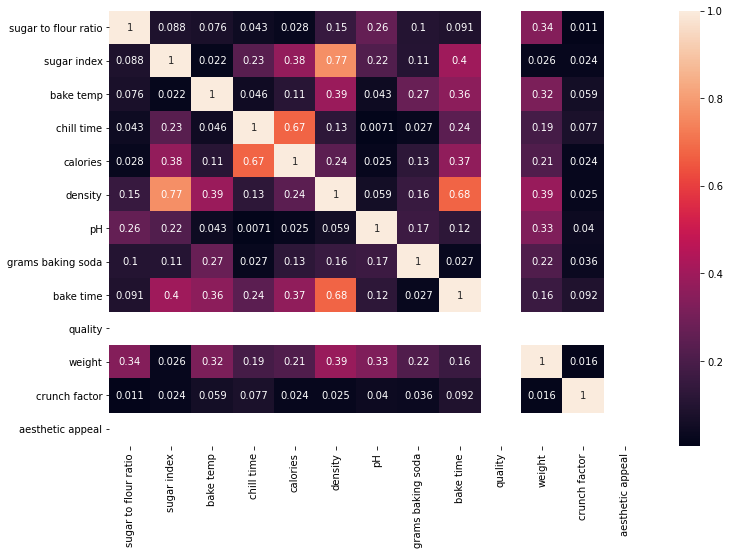

In [8]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

corrMatrix = cookies_validate.corr().abs()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Let's see the values for string columns values and then drop de outliers with numerical values columns**

In [11]:
cookies['butter type'].unique() #For One Hot
cookies['mixins'].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', 'peanut butter, raisins', 'oats'], dtype=object)

In [84]:
# we observe that mixins there's a not space applied in 'nuts,raisins', then we replace with space
cookies_validate["mixins"] = cookies_validate["mixins"].str.replace("nuts,raisins", "nuts, raisins")

**Detect outliers**

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text major ticklabel objects>)

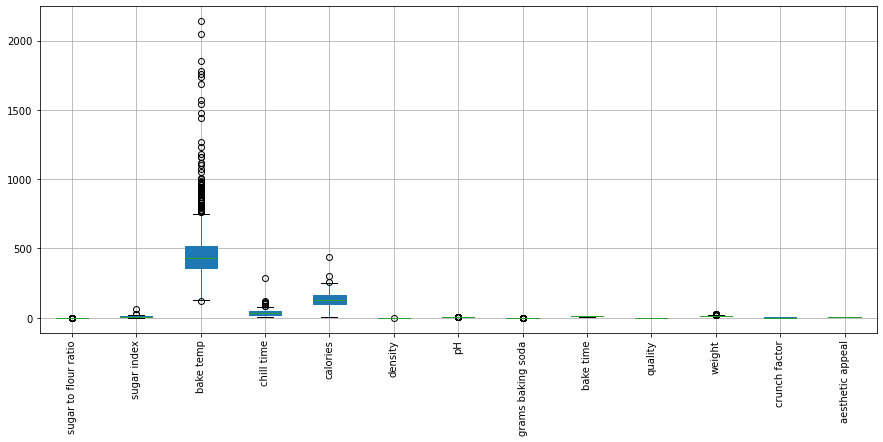

In [9]:
#Detect the outliers
plt.subplots(figsize=(15,6))
cookies_validate.boxplot(patch_artist=True)
plt.xticks(rotation=90)

# Pre-processing categorical features

## Get dummies: Ord+cord

In [85]:
#One Hot
cookies_validate = pd.concat([cookies_validate,pd.get_dummies(cookies_validate['butter type'], prefix='butter type')],axis=1)
cookies_validate.drop(['butter type'],axis=1, inplace=True)


In [86]:
#Ord Enc
cookies_validate['mixins'] = cookies_validate['mixins'].astype('category')
cookies_validate['mixins'] = cookies_validate['mixins'].cat.codes

In [87]:
# define X and y (features and target)
X = cookies_validate.drop(columns="quality")
X.to_csv('cookies_validate_cleaned.csv')